# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction
### Notebook 3: Topic Modelling
Project Group 13

Authors: Muhammed Kazim Çakmak, Karsanth Ponnaiya, Andrea Viczian

Date: 27th November 2023

# **Topic Modelling**

Topic modelling in computational language technologies is a method used to automatically identify topics present in an extensive collection of text documents. It leverages algorithms to uncover patterns of word co-occurrence and statistically group words that frequently appear together, enabling the extraction of meaningful themes or topics from unstructured textual data.

# **BERT**

BERTopic is a topic modelling technique that leverages transformers and a custom class-based TF-IDF to create dense clusters, allowing for easily interpretable topics while keeping essential words in the topic descriptions.

In [4]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Install the 'bertopic' library
%%capture
!pip install bertopic

In [ ]:
# # Install the 'top2vec' library
%%capture
!pip install top2vec

In [ ]:
# # Install the 'top2vec' library
%%capture
!pip install top2vec[sentence_encoders]

In [ ]:
# # Install the 'top2vec' library
%%capture
!pip install top2vec[sentence_transformers]

In [ ]:
# # Install the 'top2vec' library
%%capture
!pip install top2vec[indexing]

In [1]:
# Import necessary libraries
from bertopic import BERTopic
import pandas as pd
import numpy as np
import string
import re
import nltk
import spacy
from pathlib import Path

ModuleNotFoundError: ignored

## **Data**


In [5]:
#Read csv file
#file_path = Path("/content/drive/MyDrive/Colab Notebooks/cleantech_media_dataset_v1_20231109.csv") # Muhammed path
file_path = Path("/content/drive/My Drive/CLT_Colab Notebooks/Project_Notebooks/cleantech_media_dataset_v1_20231109.csv") #Andrea Path
#file_path = Path("/content/drive/My Drive/cleantech_media_dataset_v1_20231109.csv") #Karsanth Path

df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [ ]:
# Clean the 'content' column by removing square brackets
df["content"] = df.content.apply(lambda x : x[1:-1])

In [ ]:
# Display  the DataFrame after cleaning
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  "Qatar Petroleum ( QP) is targeting aggressive...  energyintel   
1    NaN  "• Nuclear Power Corp. of India Ltd. ( NPCIL) ...  energyintel   
2    NaN  "New US President Joe Biden took office this w...  energyintel   
3    NaN  "The slow pace of Japanese reactor restarts co...  energyintel   
4    NaN  "Two of New York City's largest pension funds ...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [ ]:
# Extract the 'content' column for topic modeling
docs = df["content"]

## **Modelling**

### Training

In [ ]:
# Create a BERTopic model for basic topic modeling
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
# Fit the model and transform the documents into topics
topics, probs = topic_model.fit_transform(docs)

2023-11-29 12:29:12,812 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/301 [00:00<?, ?it/s]

2023-11-29 12:30:14,782 - BERTopic - Embedding - Completed ✓
2023-11-29 12:30:14,784 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-11-29 12:30:46,453 - BERTopic - Dimensionality - Completed ✓
2023-11-29 12:30:46,456 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-11-29 12:30:54,887 - BERTopic - Cluster - Completed ✓
2023-11-29 12:30:54,898 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-11-29 12:31:04,851 - BERTopic - Representation - Completed ✓


### Extracting Topics

In [ ]:
# Display information about the top 20 topics
topic_model.get_topic_info()[1:21]

Topic  Count                                      Name  \
1       0    690               0_geothermal_energy_heat_of   
2       1    372             1_hydrogen_green_fuel_ammonia   
3       2    365       2_azocleantech_spoke_plastic_womens   
4       3    252    3_battery_batteries_lithiumion_lithium   
5       4    150                      4_africa_pv_solar_mw   
6       5    148                 5_dn_media_group_recharge   
7       6    136        6_plastic_waste_plastics_recycling   
8       7    134         7_offshore_wind_scotland_scottish   
9       8    105           8_charging_ev_stations_chargers   
10      9    101              9_battery_storage_system_ess   
11     10     86         10_solar_manufacturing_us_tariffs   
12     11     85                     11_rigs_rig_bkr_count   
13     12     84              12_tesla_ford_model_electric   
14     13     81               13_offshore_wind_boem_lease   
15     14     74                      14_shale_gas_oil_ngi   
16     15     70                   15_bcf_cents_gas_prices   
17     16     69              16_storage_uk_battery_energy   
18     17     65  17_australia_queensland_australian_cable   
19     18     61                  18_gas_natural_daily_ngi   
20     19     58               19_government_uk_zero_green   

                                       Representation  \
1   [geothermal, energy, heat, of, drilling, the, ...   
2   [hydrogen, green, fuel, ammonia, is, to, of, a...   
3   [azocleantech, spoke, plastic, womens, intervi...   
4   [battery, batteries, lithiumion, lithium, of, ...   
5   [africa, pv, solar, mw, website, this, power, ...   
6   [dn, media, group, recharge, read, nhst, priva...   
7   [plastic, waste, plastics, recycling, packagin...   
8   [offshore, wind, scotland, scottish, scotwind,...   
9   [charging, ev, stations, chargers, charge, tes...   
10  [battery, storage, system, ess, magazine, ener...   
11  [solar, manufacturing, us, tariffs, domestic, ...   
12  [rigs, rig, bkr, count, week, period, daily, n...   
13  [tesla, ford, model, electric, sales, vehicle,...   
14  [offshore, wind, boem, lease, dn, us, recharge...   
15  [shale, gas, oil, ngi, natural, daily, permian...   
16  [bcf, cents, gas, prices, natural, week, futur...   
17  [storage, uk, battery, energy, bess, grid, to,...   
18  [australia, queensland, australian, cable, pro...   
19  [gas, natural, daily, ngi, news, issn, shale, ...   
20  [government, uk, zero, green, net, climate, sc...   

                                  Representative_Docs  
1   ['The world needs energy sources that contribu...  
2   ['Governments shouldn’ t be rewarding firms th...  
3   ["By clicking `` Allow All '' you agree to the...  
4   ["By clicking `` Allow All '' you agree to the...  
5   ['While East Africa – and Kenya is particular ...  
6   ['Floating wind specialist Aker Offshore Wind ...  
7   ["By clicking `` Allow All '' you agree to the...  
8   ['Energy giant BP will make Aberdeen the centr...  
9   ['Electric vehicle adoption is jumping in coun...  
10  ['Panasonic’ s EverVolt home battery supports ...  
11  ['The Dept. of Commerce today released its pre...  
12  ['Sign in to get the best natural gas news and...  
13  ['How did US electric vehicle sales go in 2020...  
14  ['The US will hold as many as seven offshore l...  
15  ['Sign in to get the best natural gas news and...  
16  ['Sign in to get the best natural gas news and...  
17  ['', '', 'The Megawatt Hour is the latest podc...  
18  ['The Australian government’ s green bank has ...  
19  ['Sign in to get the best natural gas news and...  
20  ["In his Budget address to Parliament this aft...

In [ ]:
# Select the most frequent topic
topic_model.get_topic(0)

[('geothermal', 0.0364913597940832),
 ('energy', 0.008938515996354266),
 ('heat', 0.008062993826134124),
 ('of', 0.007828438490490947),
 ('drilling', 0.007809053226522362),
 ('the', 0.007786778031109867),
 ('heating', 0.007571879381344927),
 ('in', 0.007030670867192672),
 ('and', 0.0068472942884205855),
 ('project', 0.006497282481865616)]

## **Visualization**

### Visualize Topics

In [ ]:
# Visualize the topics using a UMAP plot
topic_model.visualize_topics()

### Visualize Topic Probabilities


In [ ]:
# Visualize the hierarchy of topics
topic_model.visualize_distribution(probs[400], min_probability=0.004)

### Visualize Topic Hierarchy

In [ ]:
# Visualize the hierarchy of topics
topic_model.visualize_hierarchy(top_n_topics=20)



### Visualize Terms

In [ ]:
# Visualize a barchart of the top topics
topic_model.visualize_barchart(top_n_topics=20)

### Visualize Topic Similarity

In [ ]:
# Visualize a heatmap of topic probabilities
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

### Visualize Term Score Decline

In [ ]:
# Plot the c-TF-IDF scores continiuosly for each topic
topic_model.visualize_term_rank()

We see the scores are starting with high score then decreasing as expected since new owrds are coming

## **Model Tuning**

In [ ]:
# Import the CountVectorizer and KeyBERTInspired classes
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired

### Update Topics

In [ ]:
# Create a CountVectorizer for feature extraction
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english",max_features=10_000, min_df=10)
# Create a KeyBERTInspired representation model
representation_model = KeyBERTInspired()
# Update the BERTopic model with the new vectorizer and representation models
topic_model.update_topics(docs, vectorizer_model=vectorizer_model, representation_model = representation_model, top_n_words=15)

*   **ngram_range:** This parameter specifies the range of n-grams to consider when
tokenizing the text. In this case, it considers unigrams, bigrams, and trigrams.
*   **stop_words:** It specifies that common English stop words should be removed during tokenization.
*   **max_features:** Limits the number of features (unique words) to consider. It selects the top 10,000 most frequent features.
*   **min_df: **Ignores terms that have a document frequency strictly lower than the specified threshold (10 in this case).
*   The representation model is used to extract the most representative words for each topic. **KeyBERTInspired** is a representation model provided by the bertopic library.

In [ ]:
# Display information about the top 20 topics after tuning
topic_model.get_topic_info()[1:21]

Topic  Count                                               Name  \
1       0    690  0_geothermal energy_geothermal power_geotherma...   
2       1    372  1_green hydrogen_hydrogen fuel_hydrogen econom...   
3       2    365  2_azocleantech_azocleantech recently_interview...   
4       3    252  3_ev batteries_ev battery_battery recycling_ba...   
5       4    150       4_mw solar_renewable energy_renewables_solar   
6       5    148  5_media group recharge_recharge dn media_dn me...   
7       6    136  6_plastics_recycling_conventional plastics_rec...   
8       7    134  7_offshore wind industry_offshore wind project...   
9       8    105  8_ev charging stations_ev charging_ev chargers...   
10      9    101  9_battery energy storage_energy storage system...   
11     10     86  10_solar energy industries_solar industry_sola...   
12     11     85              11_rig count_gulf mexico_rig_drilling   
13     12     84  12_tesla model_tesla_investments tesla_electri...   
14     13     81  13_offshore wind energy_offshore wind industry...   
15     14     74   14_natural gas news_shale daily_gas news_oil gas   
16     15     70  15_natural gas futures_gas futures_gas prices ...   
17     16     69  16_energy storage_energy storage technologies_...   
18     17     65  17_renewable energy_renewables_renewable_energ...   
19     18     61  18_natural gas news_natural gas intelligence_b...   
20     19     58   19_zero emissions_uk government_funding_net zero   

                                       Representation  \
1   [geothermal energy, geothermal power, geotherm...   
2   [green hydrogen, hydrogen fuel, hydrogen econo...   
3   [azocleantech, azocleantech recently, intervie...   
4   [ev batteries, ev battery, battery recycling, ...   
5   [mw solar, renewable energy, renewables, solar...   
6   [media group recharge, recharge dn media, dn m...   
7   [plastics, recycling, conventional plastics, r...   
8   [offshore wind industry, offshore wind project...   
9   [ev charging stations, ev charging, ev charger...   
10  [battery energy storage, energy storage system...   
11  [solar energy industries, solar industry, sola...   
12  [rig count, gulf mexico, rig, drilling, gulf, ...   
13  [tesla model, tesla, investments tesla, electr...   
14  [offshore wind energy, offshore wind industry,...   
15  [natural gas news, shale daily, gas news, oil ...   
16  [natural gas futures, gas futures, gas prices ...   
17  [energy storage, energy storage technologies, ...   
18  [renewable energy, renewables, renewable, ener...   
19  [natural gas news, natural gas intelligence, b...   
20  [zero emissions, uk government, funding, net z...   

                                  Representative_Docs  
1   ['The world needs energy sources that contribu...  
2   ['Governments shouldn’ t be rewarding firms th...  
3   ["By clicking `` Allow All '' you agree to the...  
4   ["By clicking `` Allow All '' you agree to the...  
5   ['While East Africa – and Kenya is particular ...  
6   ['Floating wind specialist Aker Offshore Wind ...  
7   ["By clicking `` Allow All '' you agree to the...  
8   ['Energy giant BP will make Aberdeen the centr...  
9   ['Electric vehicle adoption is jumping in coun...  
10  ['Panasonic’ s EverVolt home battery supports ...  
11  ['The Dept. of Commerce today released its pre...  
12  ['Sign in to get the best natural gas news and...  
13  ['How did US electric vehicle sales go in 2020...  
14  ['The US will hold as many as seven offshore l...  
15  ['Sign in to get the best natural gas news and...  
16  ['Sign in to get the best natural gas news and...  
17  ['', '', 'The Megawatt Hour is the latest podc...  
18  ['The Australian government’ s green bank has ...  
19  ['Sign in to get the best natural gas news and...  
20  ["In his Budget address to Parliament this aft...

### Topic Reduction

In [ ]:
# Reduce the number of topics to 30
topic_model.reduce_topics(docs, nr_topics=30)

2023-11-29 12:38:30,327 - BERTopic - Topic reduction - Reducing number of topics
2023-11-29 12:39:20,850 - BERTopic - Topic reduction - Reduced number of topics from 149 to 30


In [ ]:
# Visualize the barchart of the topics after tuning and reduction
topic_model.visualize_barchart(top_n_topics=20)

We have more meaningful word represantaion after tuning ngram

In [ ]:
# Visualize the topics using a UMAP plot after redution and tuning
topic_model.visualize_topics()

We have more distinctful view after tunig

### Search Topics

In [ ]:
# Find the topics which has a high similarity with the word "technology"
similar_topics, similarity = topic_model.find_topics("technology", top_n=5); similar_topics

[17, 15, 13, 16, 5]

In [ ]:
#  Retrieve the topic most associated with the word "tesla"
topic_model.get_topic(17)

[('sustainable', 0.40567514),
 ('funding', 0.38415825),
 ('net zero', 0.36358848),
 ('infrastructure', 0.34088427),
 ('economy', 0.33562434),
 ('finance', 0.32977876),
 ('climate change', 0.31903213),
 ('budget', 0.31877276),
 ('governments', 0.31737423),
 ('economic', 0.3160106)]

# **Word2Vec and Top2Vec**


Word2Vec is a popular natural language processing (NLP) model that transforms words into numerical vectors, capturing semantic relationships between words based on their contextual usage. Developed by researchers at Google, Word2Vec employs a neural network architecture to generate dense and continuous vector representations of words, enabling machines to understand and manipulate language in a more nuanced manner. This model has become a cornerstone in the field of NLP, facilitating tasks such as language translation, sentiment analysis, and semantic similarity assessments.

In [ ]:
# imported packages
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

from gensim.models import Word2Vec
import spacy
from spacy.lang.en import English
from sklearn.manifold import TSNE
from top2vec import Top2Vec

In [ ]:
docsw2v = df
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [ ]:
# cleaning of dataset
def remove_non_alphanumeric(text):
    return ''.join(char for char in text if char.isalnum() or char.isspace())

docsw2v['content_cleaned'] = docsw2v['content'].apply(remove_non_alphanumeric)
docsw2v['title_cleaned'] = docsw2v['title'].apply(remove_non_alphanumeric)
docsw2v.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                     content_cleaned  \
0  Qatar Petroleum  QP is targeting aggressive cu...   
1   Nuclear Power Corp of India Ltd  NPCIL synchr...   
2  New US President Joe Biden took office this we...   
3  The slow pace of Japanese reactor restarts con...   
4  Two of New York Citys largest pension funds sa...   

                                       title_cleaned  
0  Qatar to Slash Emissions as LNG Expansion Adva...  
1               India Launches Its First 700 MW PHWR  
2               New Chapter for USChina Energy Trade  
3  Japan Slow Restarts Cast Doubt on 2030 Energy ...  
4     NYC Pension Funds to Divest Fossil Fuel Shares

In [ ]:
# Disable all the annotators except the tokenizer so its fast
nlp = English(disable=['tagger', 'parser', 'ner'])

def tokenize(text):
  return [t.text.lower() for t in nlp(text)]

In [ ]:
# First we apply tokenization on columns 'title' and 'content'

docsw2v['tokens_title_cleaned'] = docsw2v['title_cleaned'].apply(tokenize)
docsw2v['tokens_content_cleaned'] = docsw2v['content_cleaned'].apply(tokenize)
docsw2v['tokens_title'] = docsw2v['title'].apply(tokenize)
docsw2v['tokens_content'] = docsw2v['content'].apply(tokenize)
docsw2v.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                     content_cleaned  \
0  Qatar Petroleum  QP is targeting aggressive cu...   
1   Nuclear Power Corp of India Ltd  NPCIL synchr...   
2  New US President Joe Biden took office this we...   
3  The slow pace of Japanese reactor restarts con...   
4  Two of New York Citys largest pension funds sa...   

                                       title_cleaned  \
0  Qatar to Slash Emissions as LNG Expansion Adva...   
1               India Launches Its First 700 MW PHWR   
2               New Chapter for USChina Energy Trade   
3  Japan Slow Restarts Cast Doubt on 2030 Energy ...   
4     NYC Pension Funds to Divest Fossil Fuel Shares   

                                tokens_title_cleaned  \
0  [qatar, to, slash, emissions, as, lng, expansi...   
1       [india, launches, its, first, 700, mw, phwr]   
2        [new, chapter, for, uschina, energy, trade]   
3  [japan, slow, restarts, cast, doubt, on, 2030,...   
4  [nyc, pension, funds, to, divest, fossil, fuel...   

                              tokens_content_cleaned  \
0  [qatar, petroleum,  , qp, is, targeting, aggre...   
1  [ , nuclear, power, corp, of, india, ltd,  , n...   
2  [new, us, president, joe, biden, took, office,...   
3  [the, slow, pace, of, japanese, reactor, resta...   
4  [two, of, new, york, citys, largest, pension, ...   

                                        tokens_title  \
0  [qatar, to, slash, emissions, as, lng, expansi...   
1       [india, launches, its, first, 700, mw, phwr]   
2   [new, chapter, for, us, -, china, energy, trade]   
3  [japan, :, slow, restarts, cast, doubt, on, 20...   
4  [nyc, pension, funds, to, divest, fossil, fuel...   

                                      tokens_content  
0  [[, ", qatar, petroleum, (, qp, ), is, targeti...  
1  [[, ", •, nuclear, power, corp., of, india, lt...  
2  [[, ", new, us, president, joe, biden, took, o...  
3  [[, ", the, slow, pace, of, japanese, reactor,...  
4  [[, ", two, of, new, york, city, 's, largest, ...

## **Similarity Analysis 'title' column**

In [ ]:
# Trainining tokens title cleaned embedding space using the word2vec architecture - 'title' column

# Set values for various parameters
feature_size = 100  # Word vector dimensionality
window_context = 5  # Context window size
min_word_count = 5  # Minimum word count

w2vmodel_title = Word2Vec(sentences=docsw2v['tokens_title_cleaned'], vector_size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

In [ ]:
# Finding some similar words: Let`s take th Nr. 1 word in our dataset 'energy'
w2vmodel_title.wv.most_similar('energy', topn=5)

[('middle', 0.9916903376579285),
 ('the', 0.990750253200531),
 ('transition', 0.9876641631126404),
 ('future', 0.9873189330101013),
 ('storage', 0.9870428442955017)]

In [ ]:
# compute similarity between two words in the vocabulary by invoking the similarity() function

w2vmodel_title.wv.similarity('energy', 'solar')

0.97770256

In [ ]:
w2vmodel_title.wv.similarity('energy', 'wind')

0.9382633

In [ ]:
w2vmodel_title.wv.similarity('energy', 'renewable')

0.985528

In [ ]:
# in the next step we search similar words based on the gensim`s model:

similar_words = {
    search_term:
    [item[0] for item in w2vmodel_title.wv.most_similar([search_term], topn=5)]
    for search_term in ['energy', 'solar', 'geothermal', 'renewable']
}
similar_words

{'energy': ['middle', 'the', 'transition', 'future', 'storage'],
 'solar': ['2020', 'year', 'capacity', 'electricity', 'battery'],
 'geothermal': ['and', 'power', 'uk', 'accelerate', 'contractors'],
 'renewable': ['transition', 'fervo', 'opinion', 'technology', 'projects']}

In the upcoming section the code generates a 2D scatter plot using t-SNE (t-distributed stochastic neighbor embedding) to visualize word embeddings from a Word2Vec model.

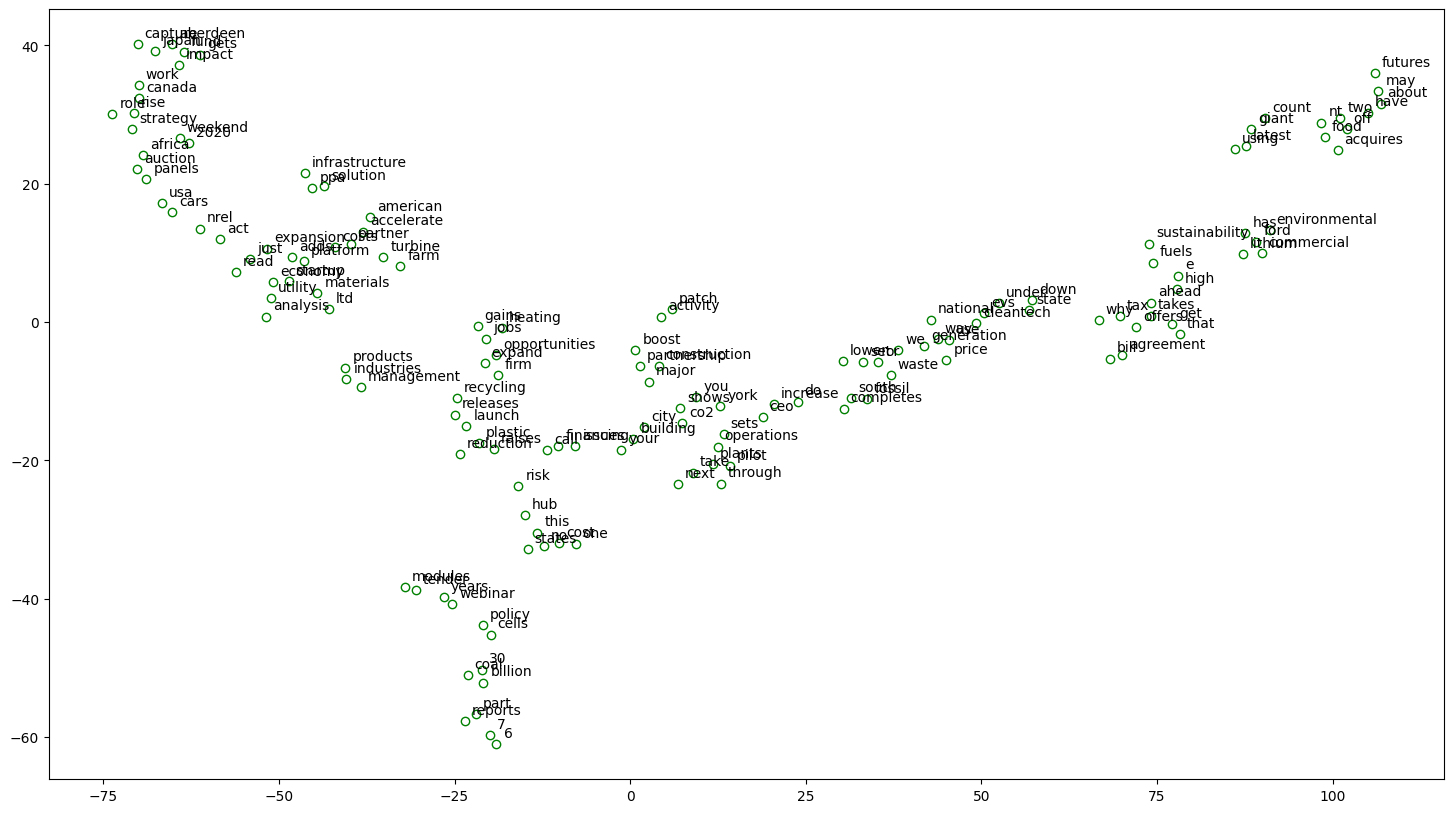

In [ ]:
# Visualizing embeddings from 'title'

from sklearn.manifold import TSNE

words = w2vmodel_title.wv.index_to_key[200:350]      ## get the word forms of voculary sample
wvs = w2vmodel_title.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(T[:, 0], T[:, 1], c='white', edgecolors='g')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')

### Visualizing embeddings from 'content' column: Scatterplot description

The provided code generates a 2D scatter plot using t-SNE (t-distributed stochastic neighbor embedding) to visualize word embeddings from a Word2Vec model.

The words, selected from the model's vocabulary, are positioned in the plot based on their semantic relationships. The use of t-SNE enhances the visualization, aiming to preserve the local relationships between words. The green points on the plot represent the word embeddings, and labels corresponding to the words are positioned near their respective points.

In [ ]:
# Select topn similar words to a given token -> Title column

def display_closestwords_tsnescatterplot(model, word, size):

    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word, topn=62)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(15, 8))
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

The above model retrieves the top n most similar words to the specified word based on the word embeddings learned by the model.

The topn parameter determines the number of similar words to be retrieved.  

The choice of the topn value depends on the specific goals of your analysis and the characteristics of your dataset. Setting a higher value for topn may provide a more comprehensive view of the word similarities but might also increase computational costs. On the other hand, setting it too low may miss important related words.

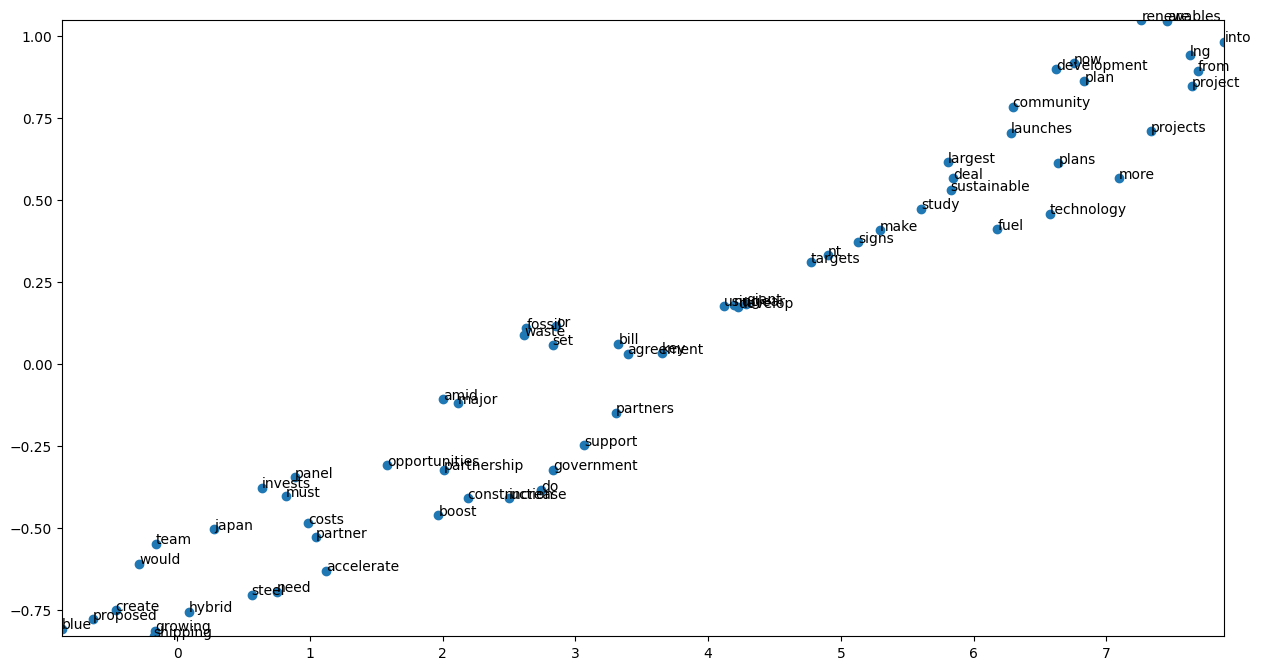

In [ ]:
# Inspect the most similar (play with topn if you like) and change the input token 'blue' to other tokens
display_closestwords_tsnescatterplot(w2vmodel_title, 'blue', 100)

## **`Similarity Analysis 'content' column`**

In [ ]:
# Trainining tokens title cleaned embedding space using the word2vec architecture -> content column

# Set values for various parameters
feature_size = 100  # Word vector dimensionality
window_context = 5  # Context window size
min_word_count = 5  # Minimum word count

w2vmodel_content = Word2Vec(sentences=docsw2v['tokens_content_cleaned'], vector_size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

In [ ]:
# in the next step we search similar words based on the gensim`s model:

similar_words = {
    search_term:
    [item[0] for item in w2vmodel_content.wv.most_similar([search_term], topn=5)]
    for search_term in ['energy', 'solar', 'geothermal', 'renewable']
}
similar_words

{'energy': ['electricity', 'power', 'energies', 'renewables', 'resource'],
 'solar': ['photovoltaic', 'offshore', 'bifacial', 'pv', 'renewable'],
 'geothermal': ['renewable', 'nuclear', 'clean', 'recurrent', 'agrivoltaics'],
 'renewable': ['renewables',
  'clean',
  'carbonfree',
  'distributed',
  'lowcarbon']}

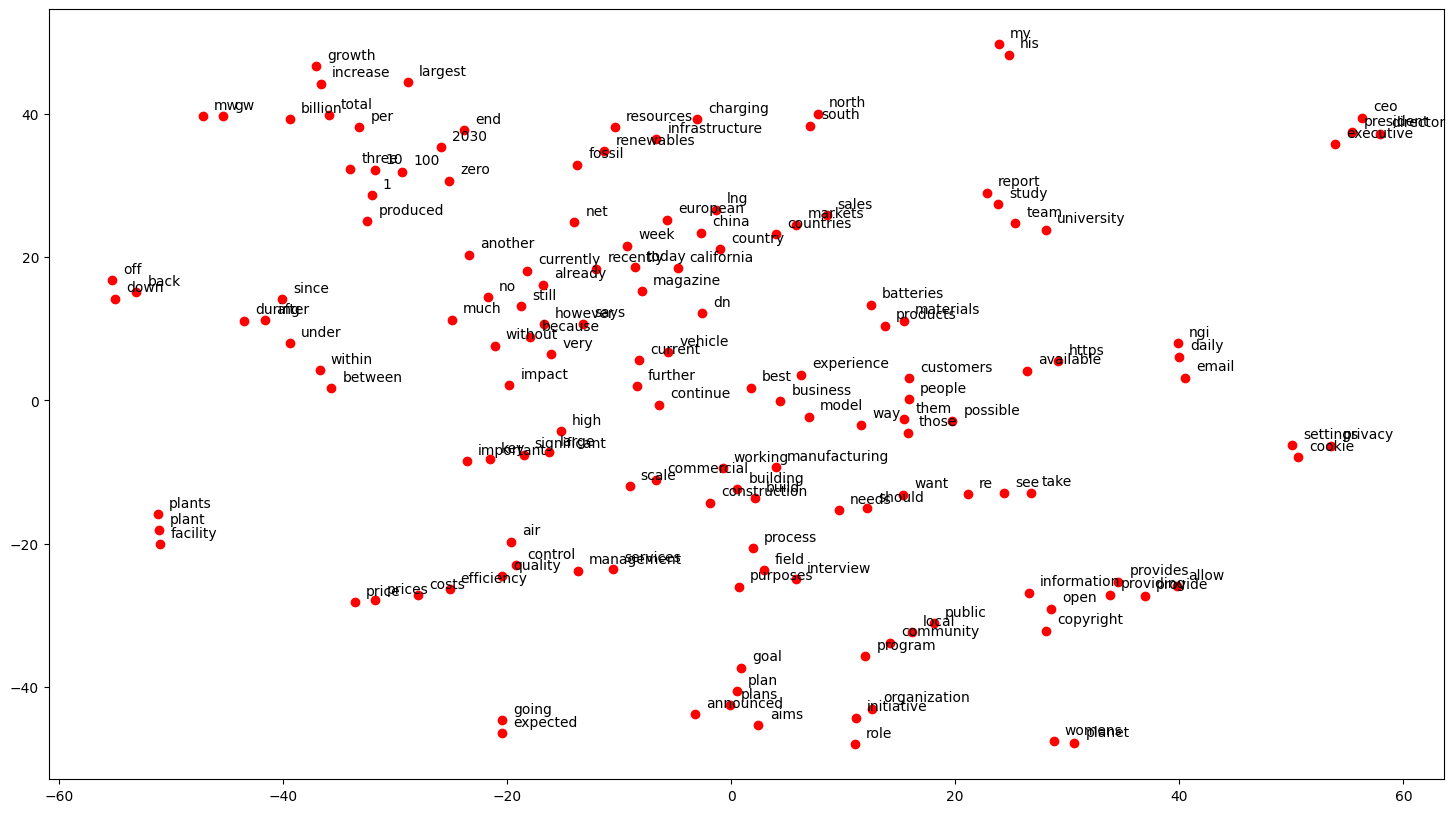

In [ ]:
# Visualizing embeddings from 'content':

from sklearn.manifold import TSNE

words = w2vmodel_content.wv.index_to_key[200:350]      ## get the word forms of voculary sample
wvs = w2vmodel_content.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')

### Visualizing embeddings from the 'content' column: Scatterplot description

On the displayed plot, distinctive clusters emerge, showcasing closely related words that share similar meanings within the context of our text input. Notably, terms like 'plant,' 'plants,' 'facility,' 'south', and 'north' are visibly grouped, underscoring their semantic proximity and contextual relevance.










In [ ]:
# Select topn similar words to a given token -> content column

def display_closestwords_tsnescatterplot(model, word, size):

    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word, topn=400)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(15, 8))
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

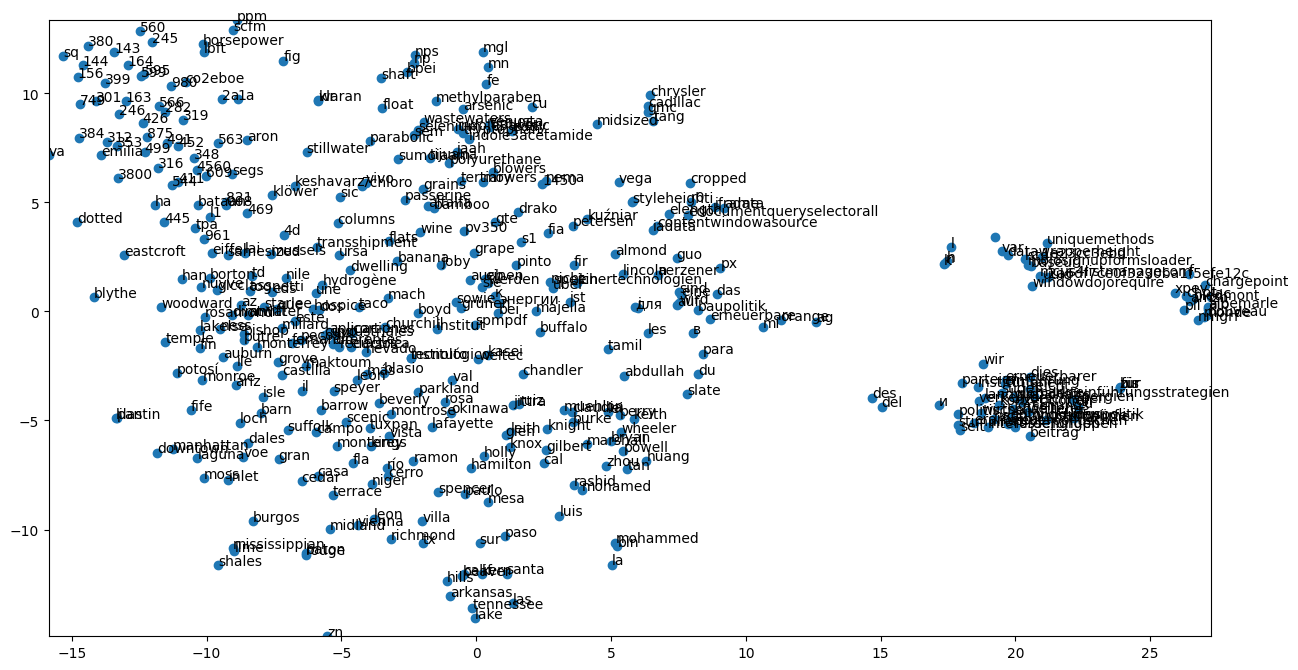

In [ ]:
# Inspect the most similar (play with topn if you like) and change the input token 'blue' to other tokens
display_closestwords_tsnescatterplot(w2vmodel_content, 'orange', 100)

### Visualizing embeddings from 'content' column: Scatterplot Description

In the scatterplot above, the topn variable is set relatively high, considering the extensive size of our dataset in the 'content' column. This choice allows us to discern distinct clusters, revealing patterns such as digits, words from various languages—including German—and foreign names. The visual representation offers valuable insights into semantic relationships within our expansive dataset.



### Word2Vec Algorithm Limitations

While the Word2Vec algorithm excels in capturing semantic relationships, it faces a limitation in handling out-of-vocabulary (OOV) words—those absent from the original training data. To address this, our code incorporates a try-and-except workaround, allowing for more robust and adaptable processing of words not encountered during training.

For large data sets and data sets with very unique vocabulary doc2vec could produce better results. This will train a doc2vec model from scratch. This method is language agnostic. However multiple languages will not be aligned.

Given our dataset has different languages we continue with the analysis with the Top2Vec algorythm.

# Top2Vec Algorythm

In [ ]:
# Flatening the list of list from the tokenized column 'tokens_content_cleaned'

documents = docsw2v['tokens_content_cleaned'].apply(lambda sublist: ' '.join(sublist)).tolist()
print(documents[0:2])


['qatar petroleum   qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch phase 2 of its planned 48 million ton per year lng expansion in its latest sustainability report published on wednesday qp said its goals include   reducing the emissions intensity of qatars lng facilities by 25 and of its upstream facilities by at least 15   the company is also aiming to reduce gas flaring intensity across its upstream facilities by more than 75 and has raised its carbon capture and storage ambitions from 5 million tonsyr to 7 million tonsyr by 2027 about 22 million tonsyr of the carbon capture goal will come from the 32 million tonyr phase 1 of the lng expansion also known as the north field east project a further 11 million tonsyr will come from phase 2 known as the north field south project which will raise qatars lng capacity by a further 16 million tonsyr qatar currently has an lng production capacity of around 78 million tonsyr and is eyeing a phased expa

In [ ]:
from top2vec import Top2Vec

model = Top2Vec(documents, speed="learn", workers=8)

2023-11-29 22:25:25,238 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-11-29 22:25:43,748 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-11-29 22:25:55,640 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-29 22:30:40,831 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-29 22:31:13,998 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-29 22:31:14,253 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
# returns the number of topics that Top2Vec has found in the data.

model.get_num_topics()

64

In [ ]:
# This will return the topics in decreasing size

topic_words, word_scores, topic_nums = model.get_topics(64)

In [ ]:
# We are going to search for topics most similar to 'energy'

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["energy"], num_topics=5)

In [ ]:
topic_nums

array([39,  0, 33,  7, 42])

In [ ]:
topic_scores

array([0.28790381, 0.26712075, 0.26382921, 0.25872594, 0.25482489])

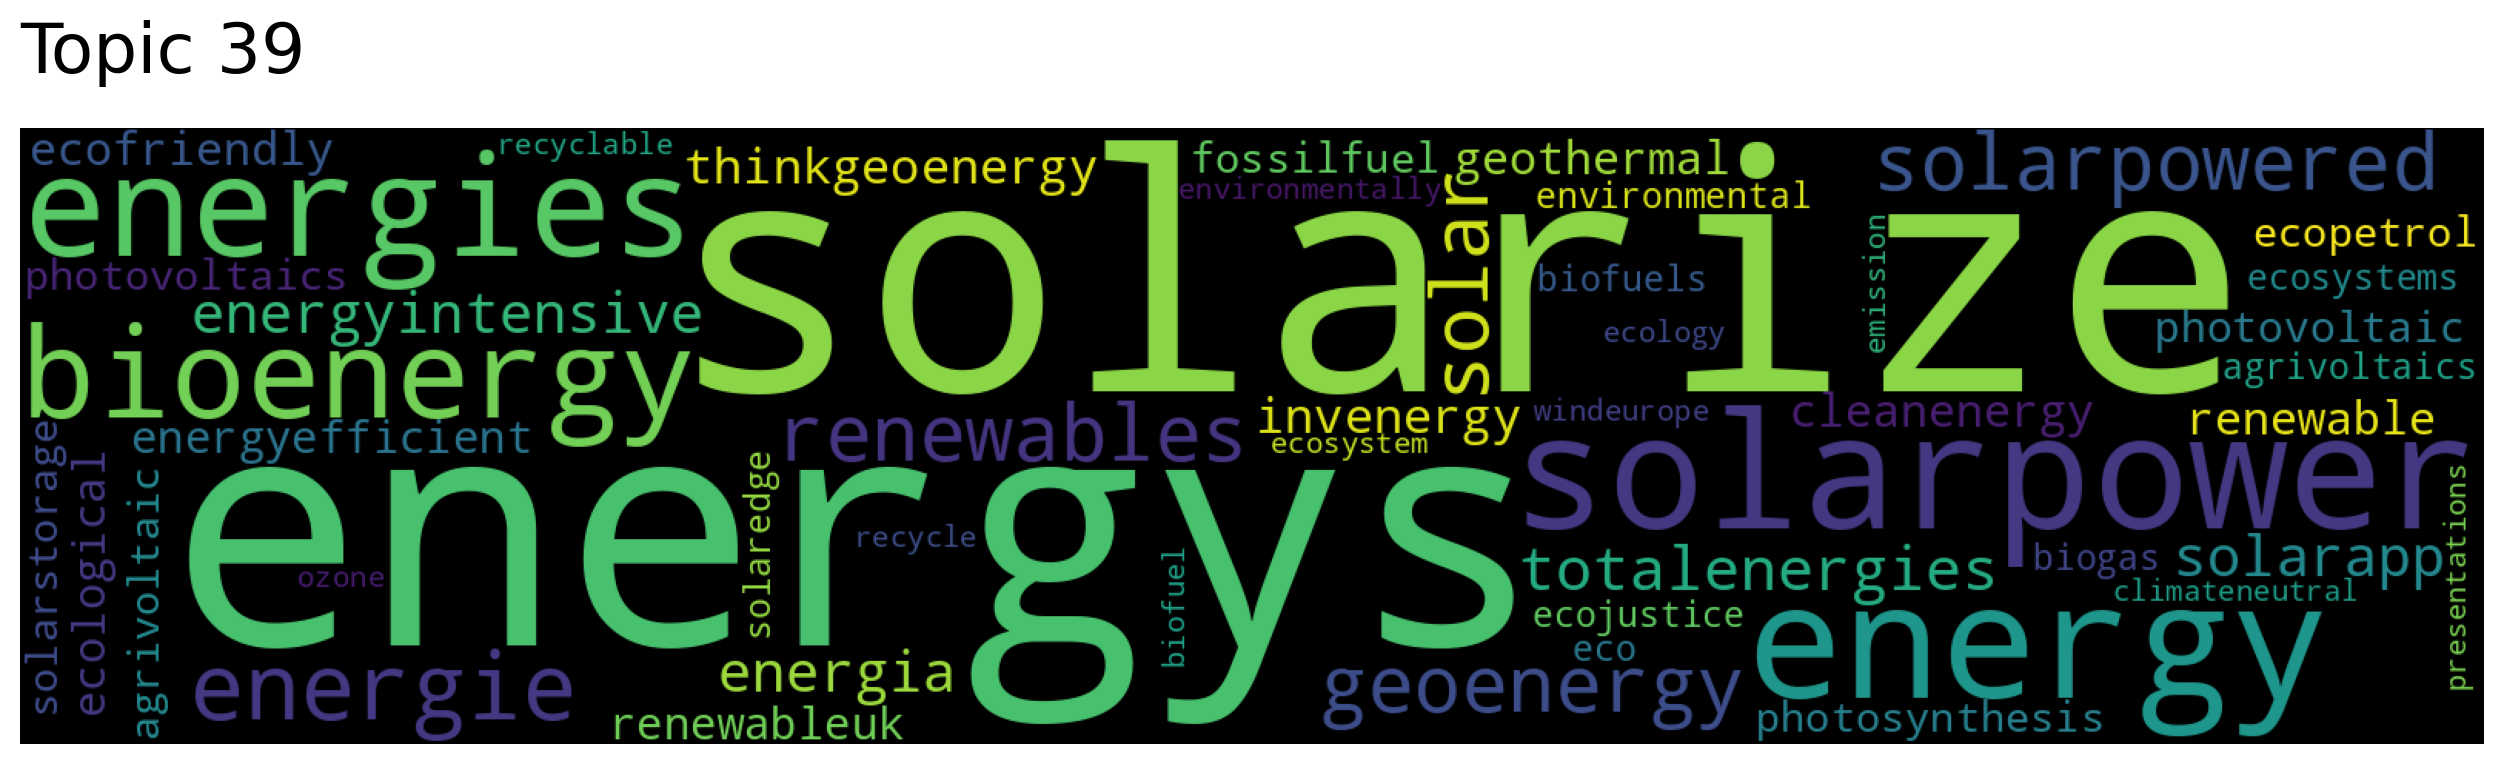

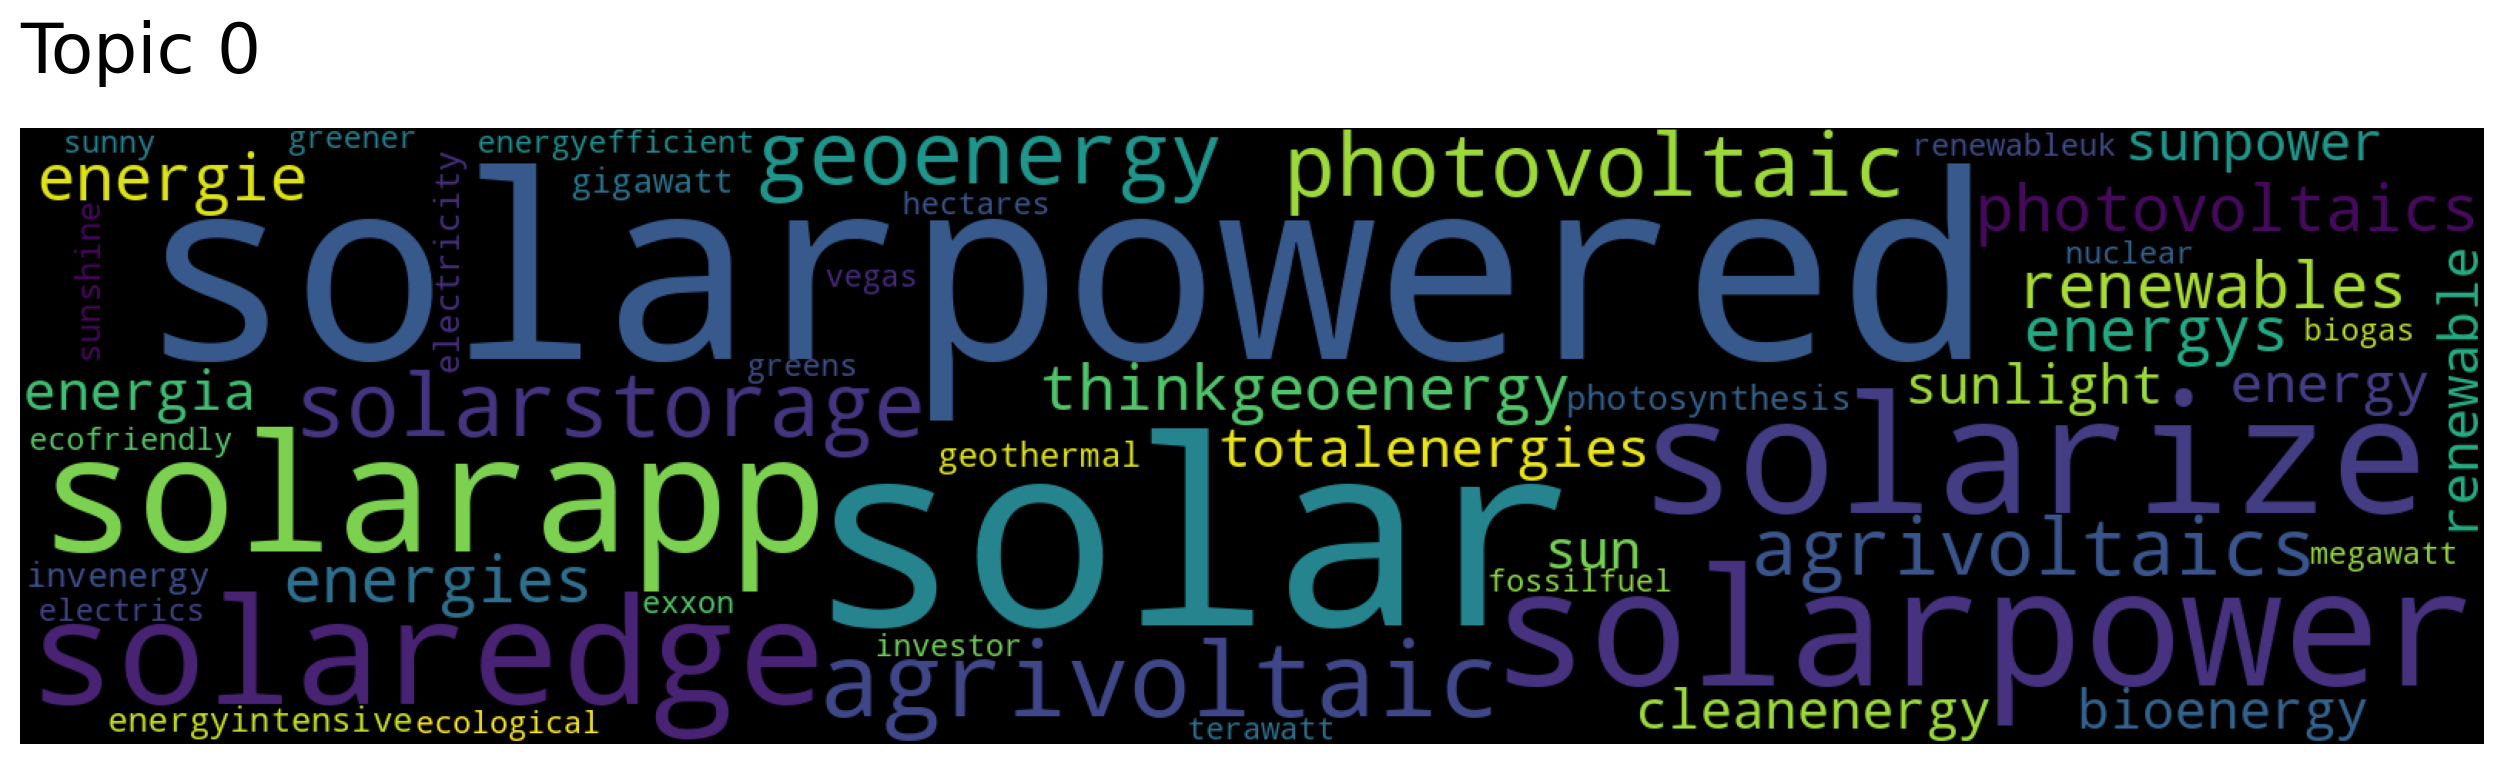

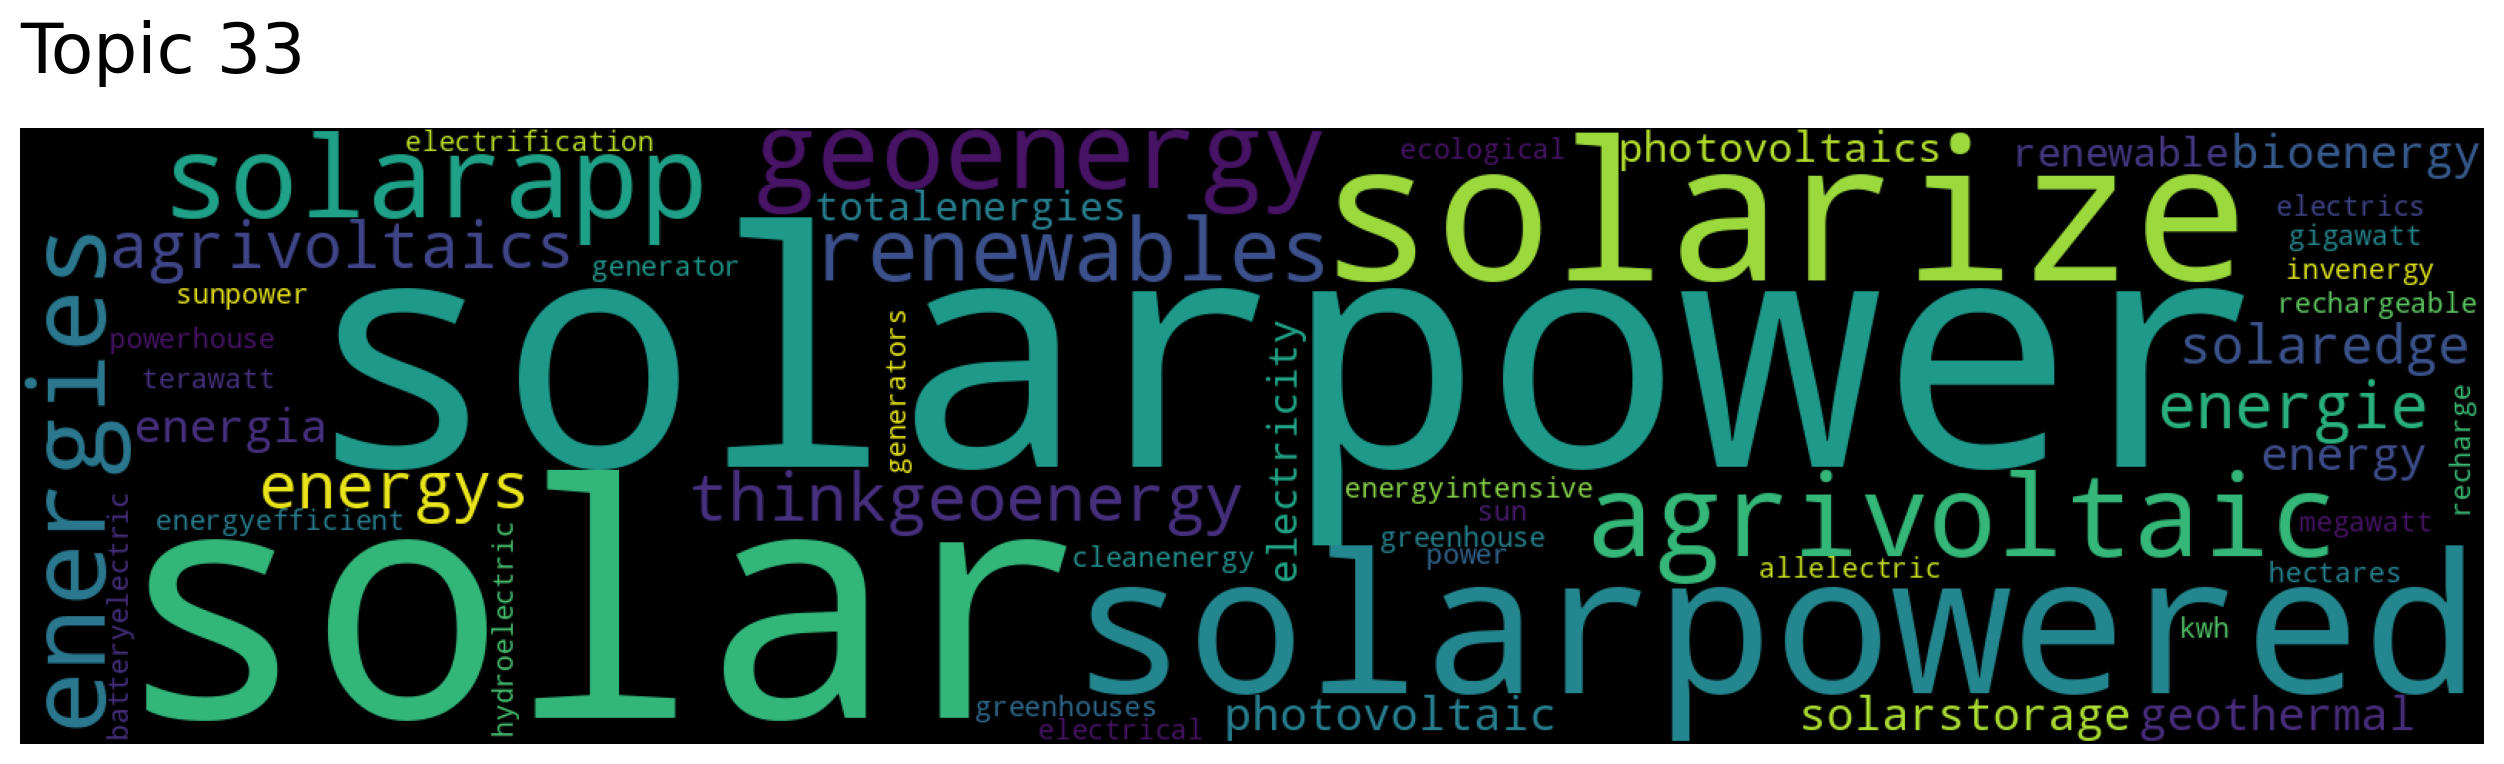

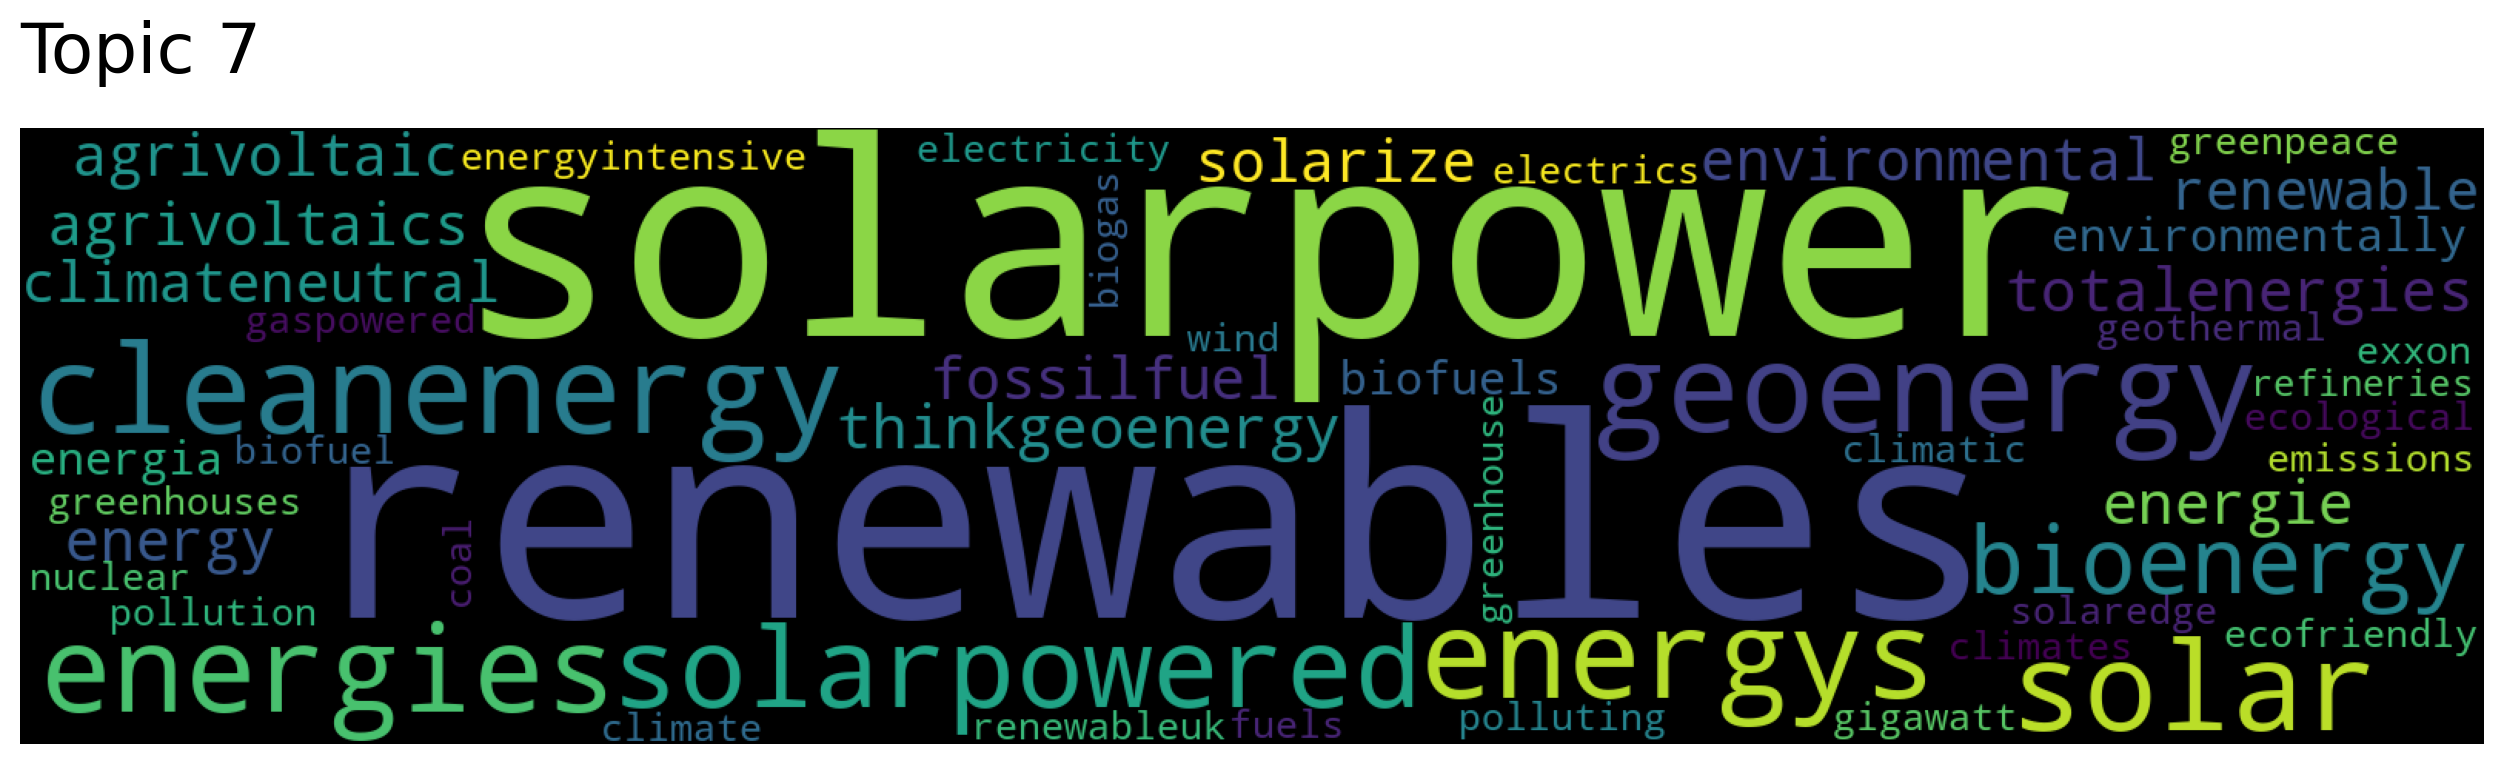

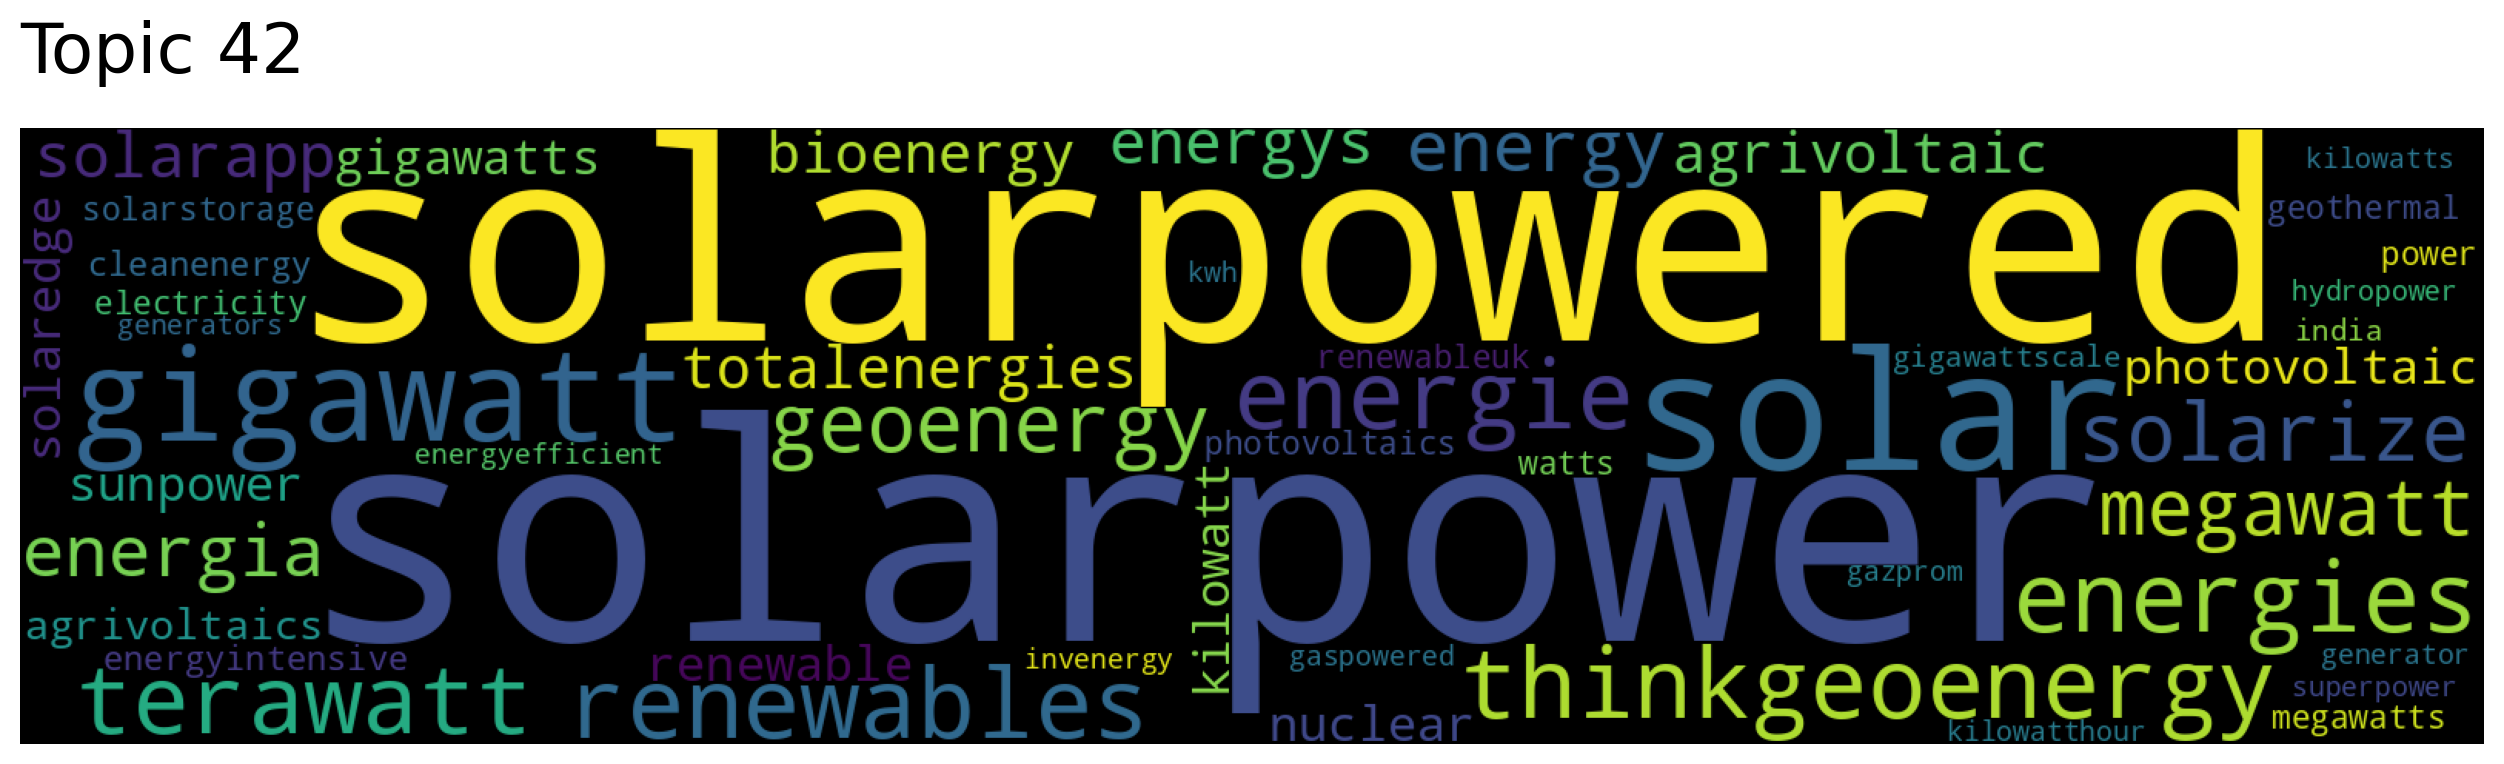

In [ ]:
# Generate a word cloud for the top most 5 similar topics to 'energy'

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["energy"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
# search by topic 7, a topic that appears to be about renewables

documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=7, num_docs=5)

# we are printing below the contentm document scores and document _ids

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 4877, Score: 0.9092264175415039
-----------
as a living document the strategy is still deeply flawed but less flawed than the first one if the doe updates it every six   and from growth of fossil gas   aka   natural   gas nuclear for commercial ships is so obviously flawed from a business perspective that i did nt even bother to include it in my quadrant chart since 2007 the use of coal for electricity generation has generally been in decline while the use of renewables has been on the rise cleantechnica is the   1 cleantechfocused news   analysis website in the us   the world focusing primarily on electric cars solar energy wind energy   energy storage news is published on cleantechnicacom and reports are published on futurecleantechnicacomreports why exactly would it be beneficial to the climate for morocco to take renewable electricity make hydrogen and products from hydrogen and ship them there s nothing like the sound of tanks rolling down city streets and bombs dropping

In [ ]:
# finally we are searching all similar keywords to 'agrivoltaics`

words, word_scores = model.similar_words(keywords=["agrivoltaics"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

agrivoltaic 0.9753095874690381
solar 0.7281489028167083
agricultural 0.7260205272448033
agripv 0.7099564820154646
farmers 0.7065074327589761
solarpowered 0.7029074340675154
agriculture 0.6955253270544139
solarpower 0.6891552442500268
photovoltaic 0.6884859217639689
farms 0.6843975986438023


### Advantages of Top2Vec Model

Top2Vec is a topic modeling and document clustering algorithm. It goes beyond word embeddings by capturing contextual information and relationships between words within the context of entire documents. Top2Vec is capable of discovering topics and clusters within a collection of documents, making it suitable for tasks like document summarization, content recommendation, and identifying thematic patterns in large text corpora.

# **LDA**

In [ ]:
import pandas as pd
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import string
from pathlib import Path


In [ ]:
file_path = Path("/content/drive/My Drive/cleantech_media_dataset_v1_20231109.csv") #Karsanth Path

df = pd.read_csv(file_path)

## **Training**

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean and preprocess the text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(f'[{string.punctuation}0-9]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return tokens

# Apply the preprocessing to each document
df['clean_content'] = df['content'].map(preprocess)

# Create a dictionary representation of the documents
dictionary = Dictionary(df['clean_content'])

# Create a corpus: list of bag-of-words vectors for each document in the corpus
corpus = [dictionary.doc2bow(text) for text in df['clean_content']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Set parameters
num_topics = 4  # Adjust the number of topics
passes = 50     # Adjust the number of passes

# Create the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

In [ ]:
# Extract the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.011*"gas" + 0.010*"“" + 0.010*"”" + 0.007*"year" + 0.006*"electric"')
(1, '0.012*"energy" + 0.010*"system" + 0.009*"battery" + 0.008*"hydrogen" + 0.008*"technology"')
(2, '0.026*"energy" + 0.020*"solar" + 0.013*"project" + 0.012*"“" + 0.011*"”"')
(3, '0.012*"azocleantech" + 0.011*"plastic" + 0.009*"woman" + 0.009*"spoke" + 0.008*"development"')


In [ ]:
from matplotlib import pyplot as plt

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=None):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


# Usage of the function
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df['content'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic

index  Dominant_Topic  Perc_Contribution  \
0         0               0             0.5953   
1         1               2             0.4724   
2         2               0             0.8655   
3         3               1             0.4704   
4         4               0             0.6900   
...     ...             ...                ...   
9602   9602               2             0.9887   
9603   9603               2             0.7326   
9604   9604               2             0.8354   
9605   9605               0             0.7308   
9606   9606               2             0.9889   

                                         Topic_Keywords  \
0     gas, “, ”, year, electric, natural, energy, sa...   
1     energy, solar, project, “, ”, power, new, data...   
2     gas, “, ”, year, electric, natural, energy, sa...   
3     energy, system, battery, hydrogen, technology,...   
4     gas, “, ”, year, electric, natural, energy, sa...   
...                                                 ...   
9602  energy, solar, project, “, ”, power, new, data...   
9603  energy, solar, project, “, ”, power, new, data...   
9604  energy, solar, project, “, ”, power, new, data...   
9605  gas, “, ”, year, electric, natural, energy, sa...   
9606  energy, solar, project, “, ”, power, new, data...   

                                                content  
0     "Qatar Petroleum ( QP) is targeting aggressive...  
1     "• Nuclear Power Corp. of India Ltd. ( NPCIL) ...  
2     "New US President Joe Biden took office this w...  
3     "The slow pace of Japanese reactor restarts co...  
4     "Two of New York City's largest pension funds ...  
...                                                 ...  
9602  'Strata Clean Energy has closed a $ 300 millio...  
9603  'Global renewable energy developer Ørsted is d...  
9604  'Veolia North America, a provider of environme...  
9605  'Once the self-proclaimed “ leading renewable ...  
9606  'Arevon Energy Inc. has closed financing on th...  

[9607 rows x 5 columns]

## **Visualization**

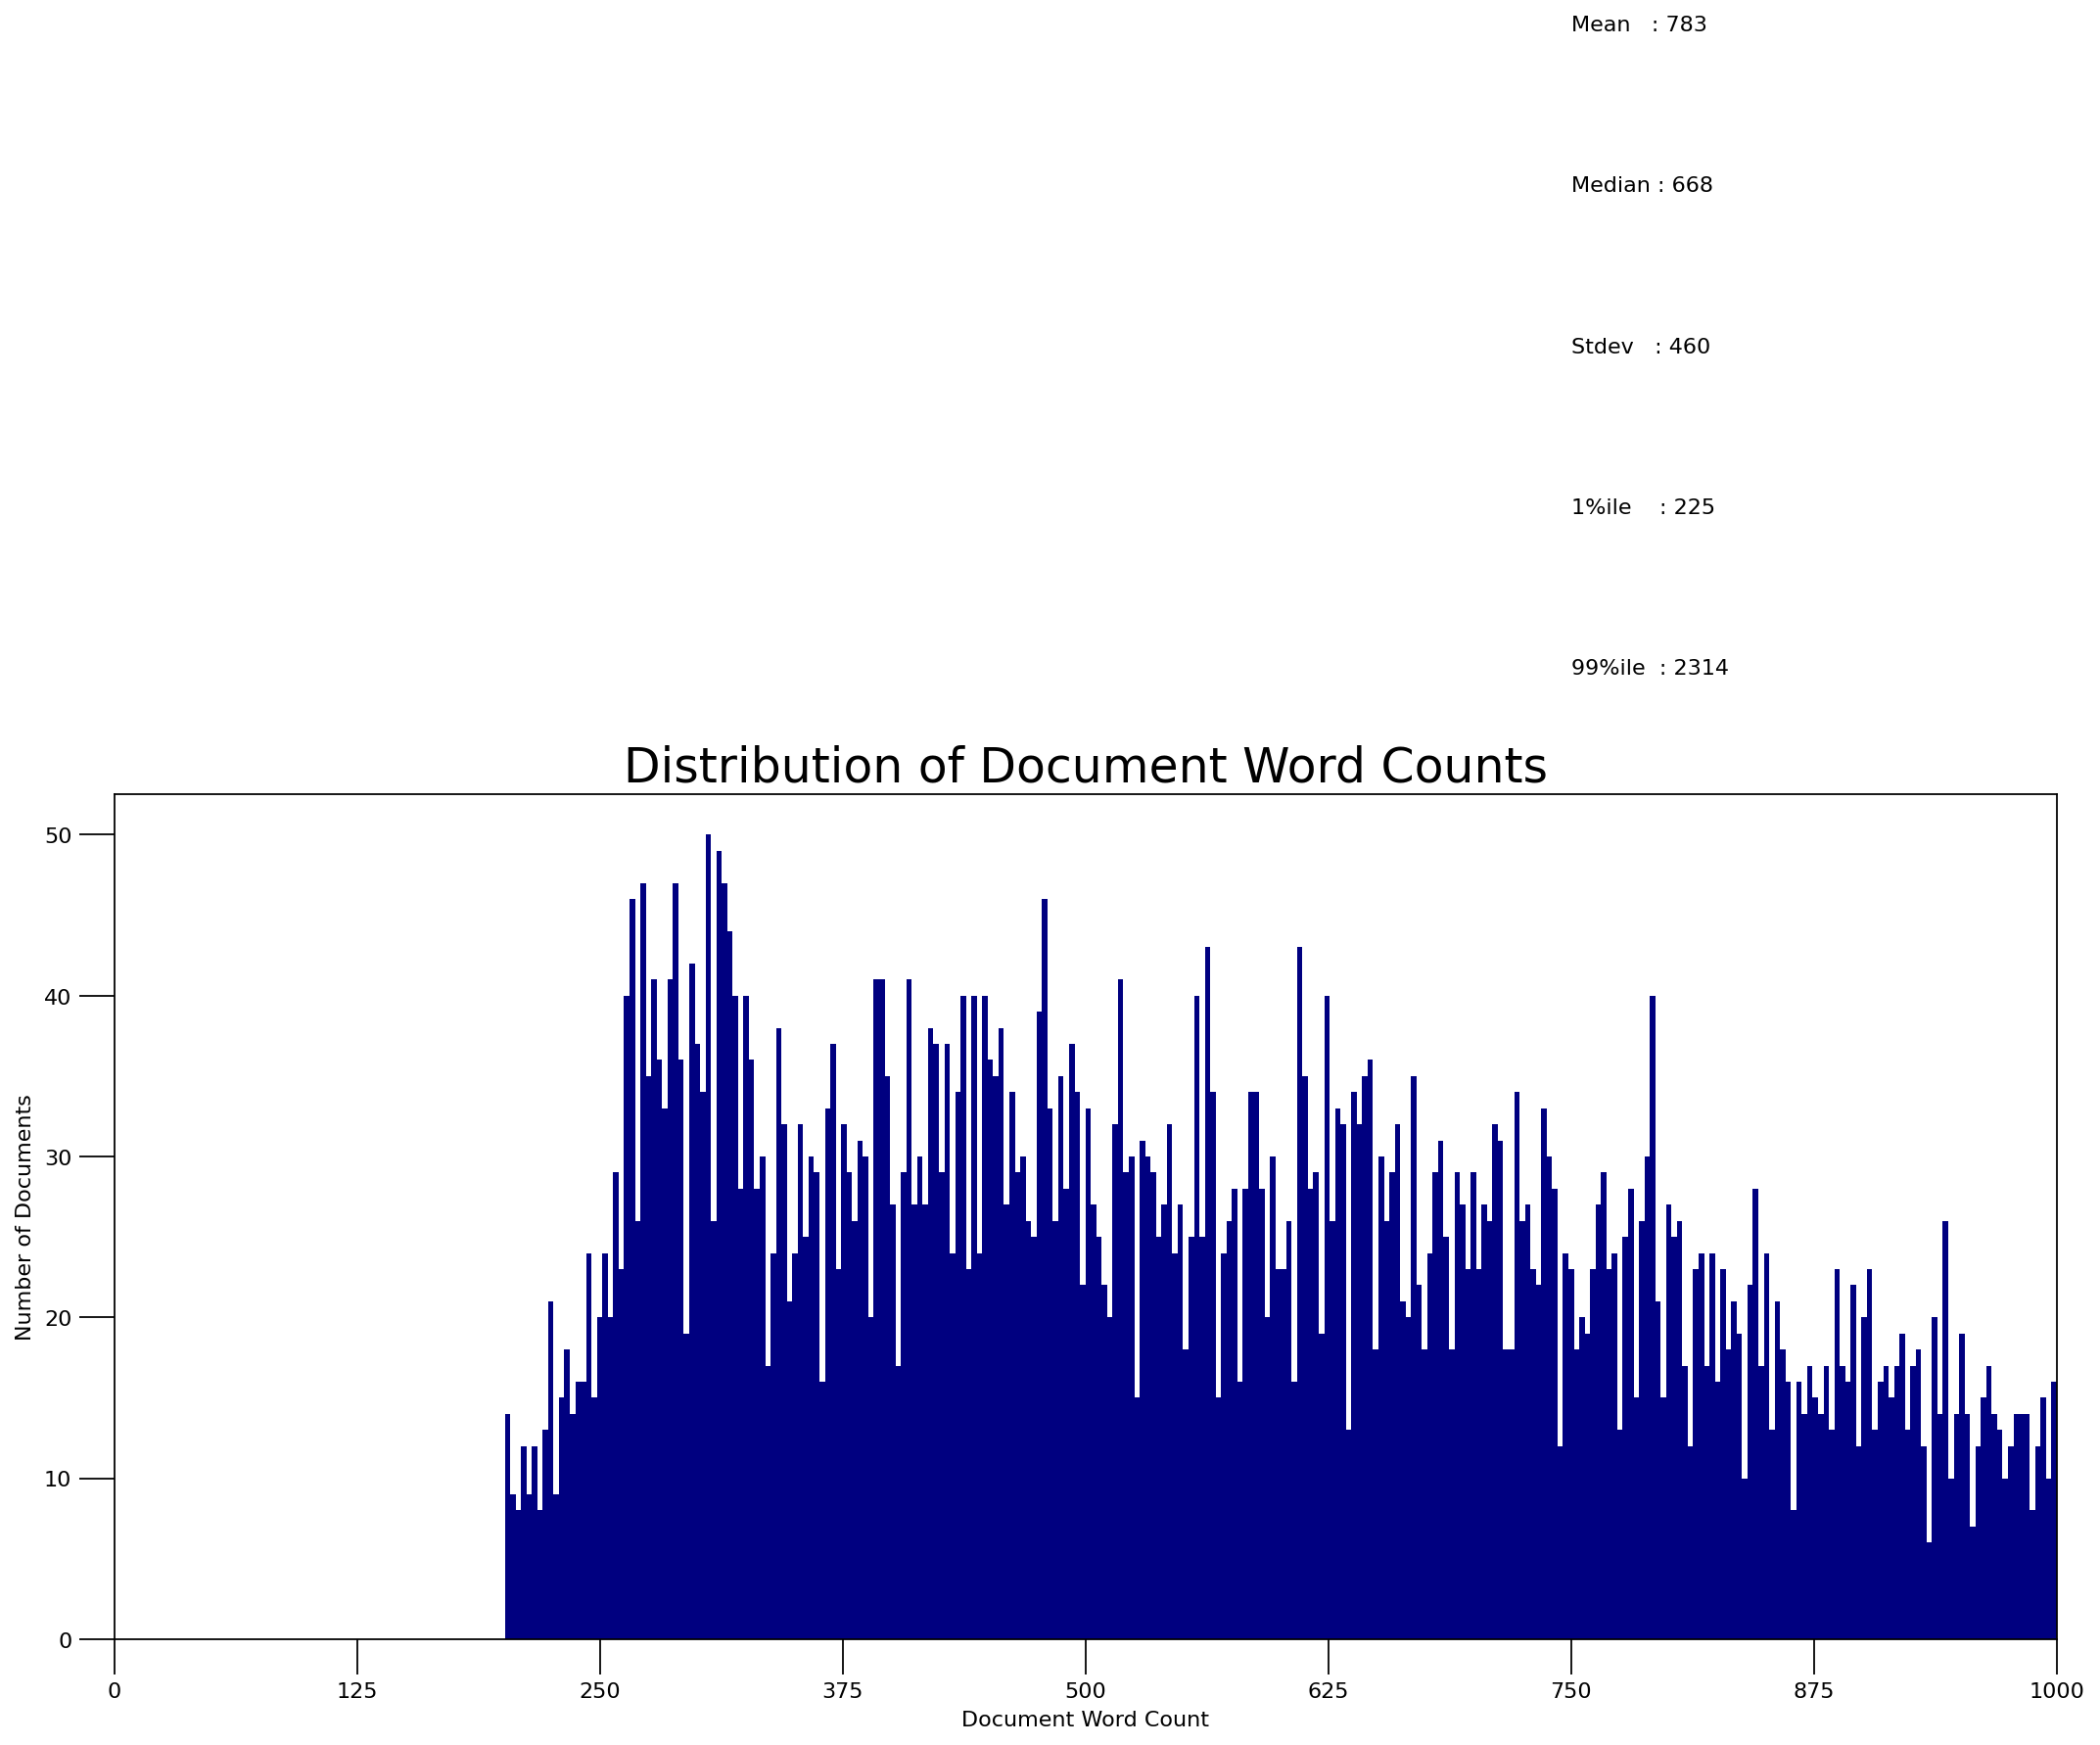

In [ ]:
# df['content'] contains the text of the documents
doc_lens = [len(d.split()) for d in df['content']]  # Splitting text into words

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins=1000, color='navy')
plt.text(750, 100, f"Mean   : {round(np.mean(doc_lens))}")
plt.text(750,  90, f"Median : {round(np.median(doc_lens))}")
plt.text(750,  80, f"Stdev   : {round(np.std(doc_lens))}")
plt.text(750,  70, f"1%ile    : {round(np.quantile(doc_lens, q=0.01))}")
plt.text(750,  60, f"99%ile  : {round(np.quantile(doc_lens, q=0.99))}")

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

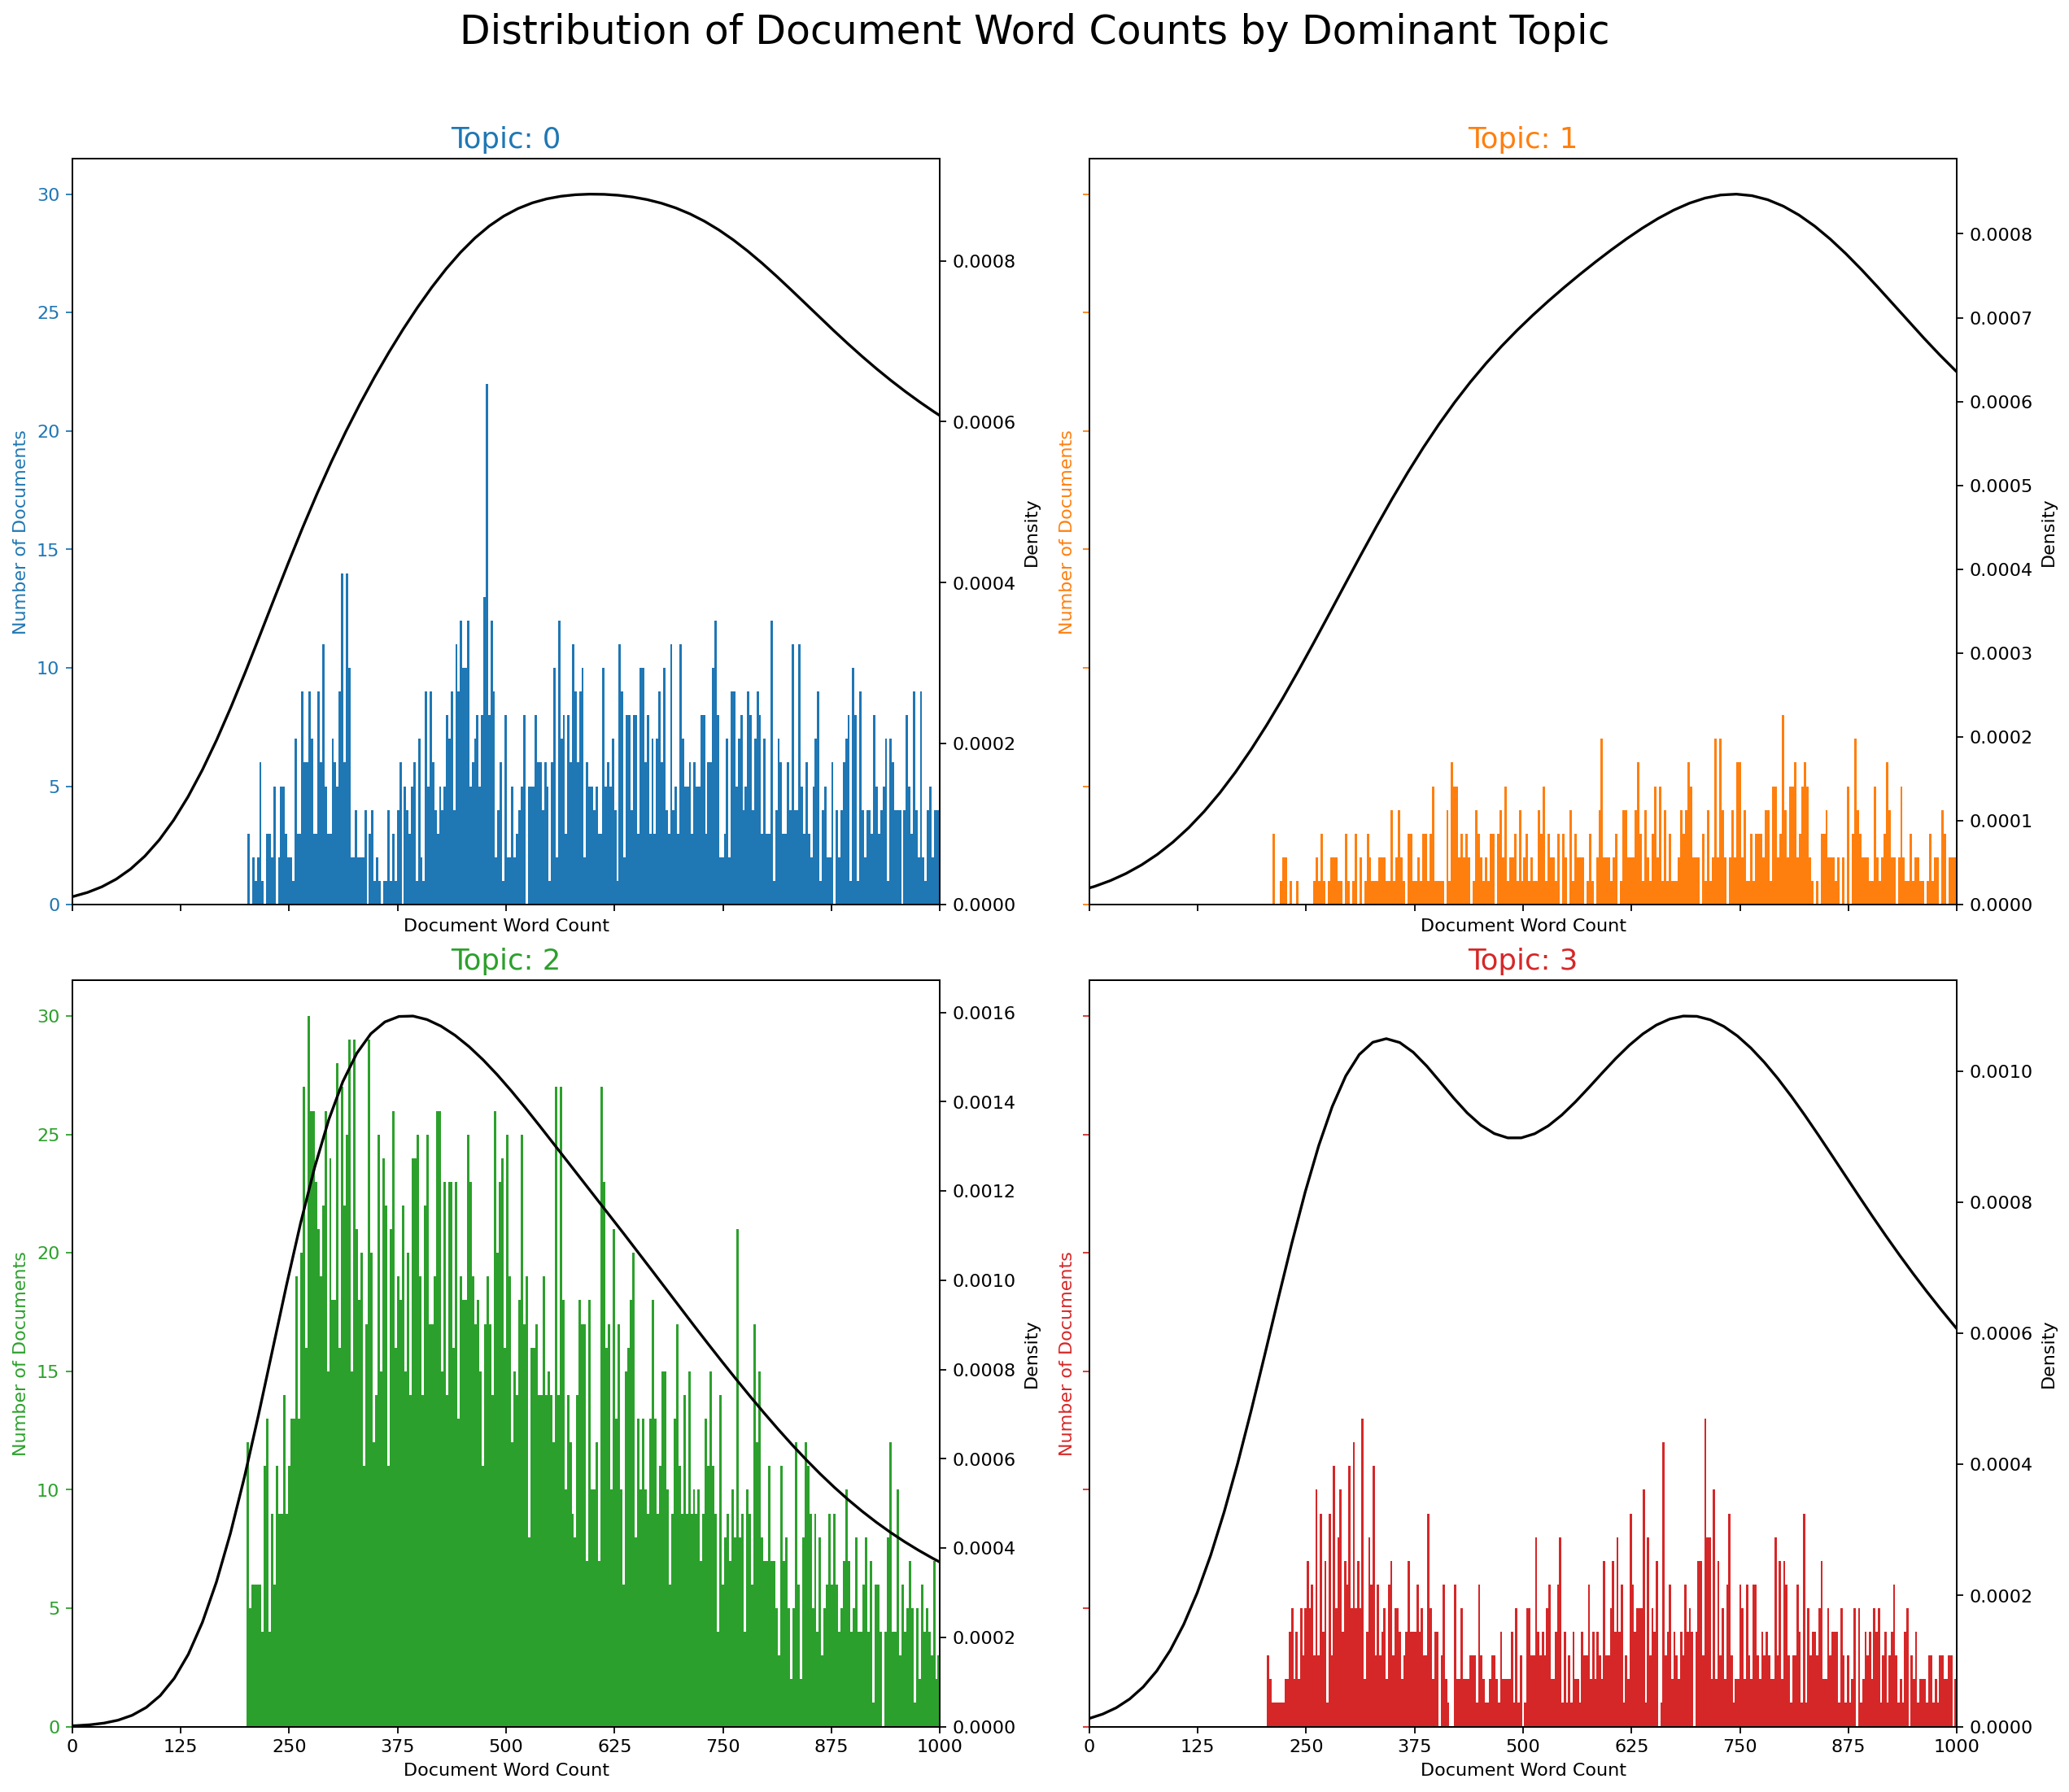

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Assuming df_dominant_topic has a 'Dominant_Topic' column
# and its index matches with df['content']

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2, 2, figsize=(16, 14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    # Filter documents for this topic
    indices = df_dominant_topic[df_dominant_topic.Dominant_Topic == i].index
    doc_lens = [len(doc.split()) for doc in df.loc[indices, 'content']]

    ax.hist(doc_lens, bins=1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0, 1000, 9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()


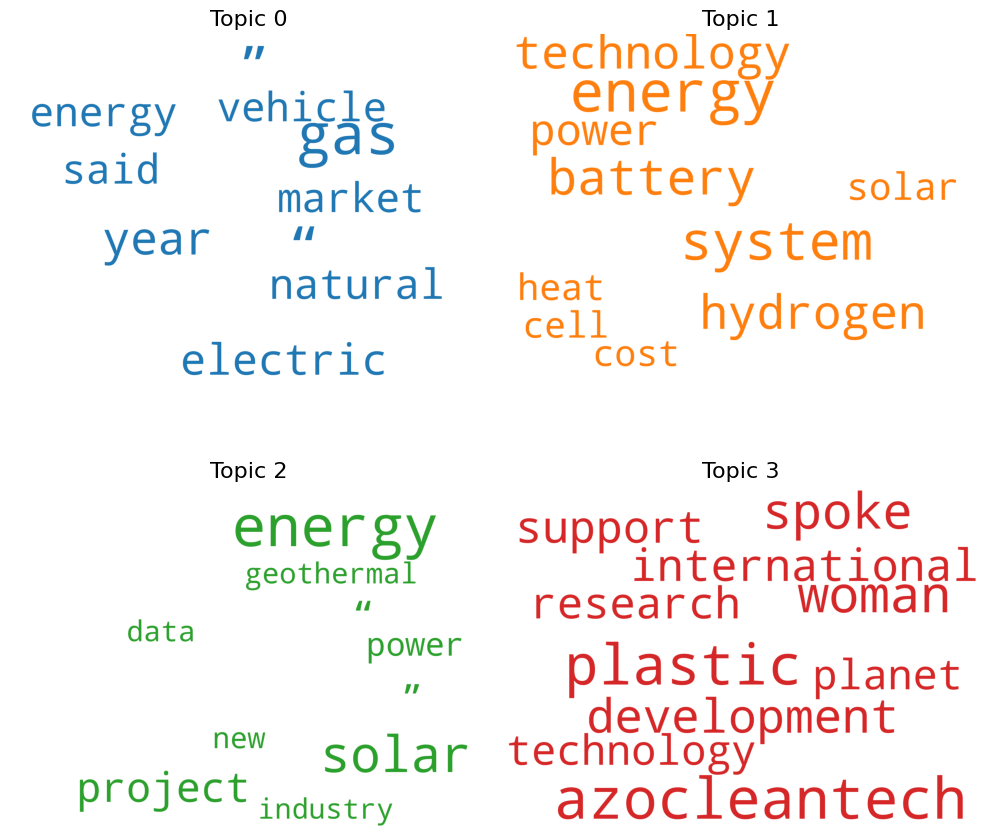

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:

import pyLDAvis.gensim
import pyLDAvis
import gensim
import joblib

# Ensure that pyLDAvis is enabled for Jupyter Notebooks
pyLDAvis.enable_notebook()

# Prepare the LDA visualization
# Assuming lda_model, corpus, and dictionary are already defined
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Display the visualization
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.087024 -0.006278       1        1  36.755521
0      0.121877 -0.101493       2        1  30.356920
1      0.015299  0.154816       3        1  20.151791
3     -0.224200 -0.047045       4        1  12.735768, topic_info=               Term          Freq         Total Category  logprob  loglift
133           solar  37657.000000  37657.000000  Default  30.0000  30.0000
43839  azocleantech   6583.000000   6583.000000  Default  29.0000  29.0000
3149        plastic   6370.000000   6370.000000  Default  28.0000  28.0000
35           energy  61165.000000  61165.000000  Default  27.0000  27.0000
2740          woman   5158.000000   5158.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
53              gas   2724.559339  19523.846617   Topic4  -5.3365   0.0914
19          company   2533.831512  16919.872797   Topic4  -5.4091   0.1620
177           clean   2190.222826   9647.510181   Topic4  -5.5548   0.5781
106         project   2205.125835  24380.741578   Topic4  -5.5480  -0.3423
857         natural   2175.320740  10281.107565   Topic4  -5.5616   0.5076

[334 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
43835      4  0.999797      adina
13677      2  0.999592  advertise
6182       1  0.024019  affiliate
6182       2  0.976039  affiliate
43836      4  0.999719        afm
...      ...       ...        ...
583        4  0.007396          “
584        1  0.504229          ”
584        2  0.374751          ”
584        3  0.118052          ”
584        4  0.002999          ”

[637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])